In [3]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import tkinter as tk
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

In [4]:
data = pd.read_csv("Language Detection.csv")
print(data.head())

                                                Text Language
0   Nature, in the broadest sense, is the natural...  English
1  "Nature" can refer to the phenomena of the phy...  English
2  The study of nature is a large, if not the onl...  English
3  Although humans are part of nature, human acti...  English
4  [1] The word nature is borrowed from the Old F...  English


In [5]:
data.isnull().sum()

Text        0
Language    0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10337 entries, 0 to 10336
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      10337 non-null  object
 1   Language  10337 non-null  object
dtypes: object(2)
memory usage: 161.6+ KB


In [7]:
data.describe()

,Text,Language
count,10337,10337
unique,10267,17
top,Jag är ledsen.,English
freq,3,1385


In [8]:
data["Language"].value_counts()

English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           63
Name: Language, dtype: int64

In [9]:
X = data["Text"]
y = data["Language"]

In [10]:
# creating a list for appending the preprocessed text
data_list = []
# iterating through all the text
for text in X:
       # removing the symbols and numbers
        text = re.sub(r'[!@#$(),n"%^*?:;~`0-9]', ' ', text)
        text = re.sub(r'[[]]', ' ', text)
        # converting the text to lower case
        text = text.lower()
        # appending to data_list
        data_list.append(text)

In [11]:
#Bag of Words
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(data_list).toarray()
X.shape 

(10337, 34937)

In [12]:
#Train test split

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [13]:
#Model training

from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

In [14]:
#Prediction
y_pred = model.predict(x_test)
y_pred

array(['English', 'Kannada', 'Dutch', ..., 'Portugeese', 'Malayalam',
       'Danish'], dtype='<U10')

In [15]:
#Model Evaluation

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy is :",accuracy)

Accuracy is : 0.9738878143133463


In [16]:
from sklearn.metrics import confusion_matrix

confusionMatrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: ")
print(confusionMatrix)

Confusion Matrix: 
[[114   0   0   3   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0  79   0   2   1   0   0   0   1   0   0   0   0   0   2   0   0]
 [  0   0 112   3   1   0   0   0   1   0   0   0   0   0   0   0   0]
 [  0   0   0 243   0   0   0   0   0   0   0   0   0   1   0   0   0]
 [  0   0   0   1 204   0   0   0   1   0   0   0   0   0   0   0   0]
 [  0   1   0   1   1 107   0   0   0   0   0   0   0   0   1   0   0]
 [  0   0   0   1   0   0  79   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  17   0   0   0   0   0   0   0   0   0]
 [  0   0   1   0   0   0   0   0 128   0   0   0   0   1   1   0   0]
 [  0   0   0   4   0   0   0   0   0  64   0   0   0   0   0   0   0]
 [  0   0   0   1   0   0   0   0   0   0 113   0   0   0   0   0   0]
 [  0   0   0   0   1   0   0   0   2   0   0 158   0   1   0   0   0]
 [  0   0   0   4   0   0   0   0   0   0   0   0 127   0   0   0   0]
 [  0   0   0   1   0   0   0   0   0   0   0   0   0 158 

In [17]:
from sklearn.metrics import classification_report

classificationReport = classification_report(y_test, y_pred)
print("classificationReport: ")
print(classificationReport)

classificationReport: 
              precision    recall  f1-score   support

      Arabic       1.00      0.97      0.99       117
      Danish       0.99      0.93      0.96        85
       Dutch       0.98      0.96      0.97       117
     English       0.89      1.00      0.94       244
      French       0.98      0.99      0.98       206
      German       1.00      0.96      0.98       111
       Greek       1.00      0.99      0.99        80
       Hindi       1.00      1.00      1.00        17
     Italian       0.96      0.98      0.97       131
     Kannada       1.00      0.94      0.97        68
   Malayalam       1.00      0.99      1.00       114
  Portugeese       1.00      0.98      0.99       162
     Russian       1.00      0.97      0.98       131
     Spanish       0.96      0.99      0.98       159
    Sweedish       0.97      0.97      0.97       135
       Tamil       1.00      0.98      0.99        91
     Turkish       1.00      0.91      0.95       100

   

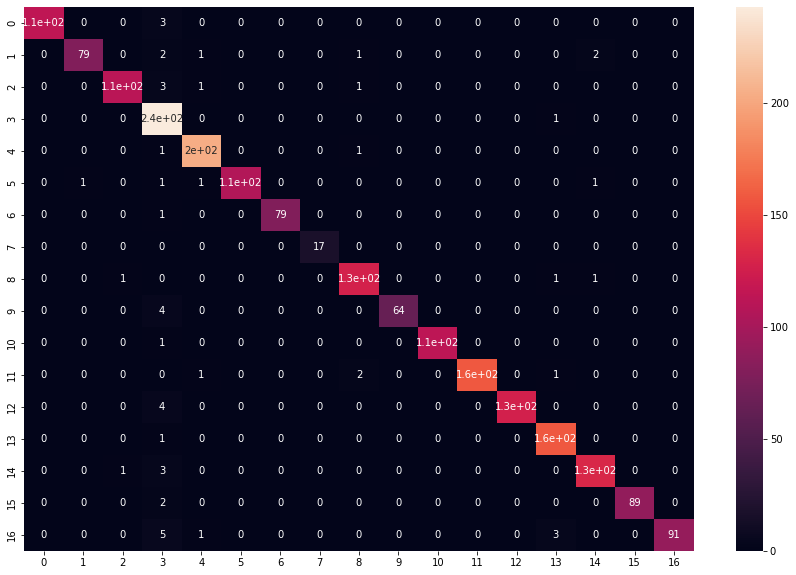

In [18]:
#visualization

plt.figure(figsize=(15,10))
sns.heatmap(confusionMatrix, annot = True)
plt.show()

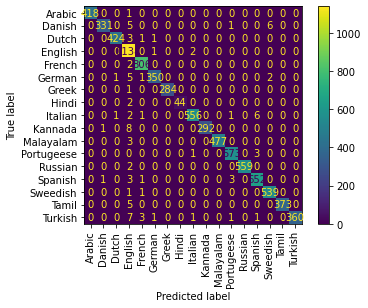

In [19]:
from sklearn.metrics import plot_confusion_matrix

graph = plot_confusion_matrix(model,x_train,y_train)
plt.xticks(rotation = 90)
plt.show()

In [20]:
#testing
test_data = pd.read_csv("test_data_language.csv")
test_data

,Text,Language
0,Several sentences often make a paragraph,English
1,There are normally three to eight sentences in...,English
2,Does he play tennis,English
3,The train leaves every morning,English
4,Water freezes,English
...,...,...
199,???? ??? ????? ???,Hindi
200,???? ???? ?? ??? ???,Hindi
201,???? ??? ?? ?????,Hindi
202,?? ????? ???? ?? ???,Hindi


In [21]:
test_data["Language"].value_counts()

English       12
Arabic        12
Greek         12
Kannada       12
Danish        12
Tamil         12
German        12
Turkish       12
Dutch         12
Malayalam     12
Sweedish      12
Russian       12
Italian       12
Portugeese    12
Spanish       12
French        12
Hindi         12
Name: Language, dtype: int64

In [22]:
new_test_x = test_data['Text']
new_test_y = test_data['Language']

In [23]:
data = cv.transform(new_test_x).toarray()
output = model.predict(data)
output

array(['English', 'English', 'English', 'English', 'English', 'English',
       'English', 'English', 'English', 'English', 'English', 'English',
       'English', 'English', 'English', 'English', 'English', 'English',
       'English', 'English', 'English', 'English', 'English', 'English',
       'French', 'French', 'French', 'French', 'French', 'French',
       'French', 'French', 'French', 'French', 'French', 'French',
       'Spanish', 'Spanish', 'Spanish', 'Spanish', 'Spanish', 'Spanish',
       'Spanish', 'English', 'Spanish', 'Portugeese', 'Spanish',
       'Spanish', 'Portugeese', 'Portugeese', 'Portugeese', 'Portugeese',
       'Portugeese', 'Portugeese', 'Portugeese', 'Portugeese',
       'Portugeese', 'Portugeese', 'Portugeese', 'Portugeese', 'Italian',
       'Italian', 'Italian', 'Italian', 'Italian', 'Italian', 'Italian',
       'Italian', 'Italian', 'Italian', 'Italian', 'Italian', 'English',
       'English', 'English', 'English', 'English', 'English', 'English',
      

In [24]:
#Model Evaluation

from sklearn.metrics import accuracy_score
ac = accuracy_score(new_test_y, output)

print("Accuracy is :",ac)

Accuracy is : 0.5196078431372549


In [25]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(new_test_y, output)
print("Confusion Matrix: ")
print(cm)

Confusion Matrix: 
[[ 0  0  0 12  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 10  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 11  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 12  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 12  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  3  0  0  0  9  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 12  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 12  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 12  0  0  0  0  0  0  0  0]
 [ 0  0  0 12  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 12  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 12  0  0  0  0  0]
 [ 0  0  0 12  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0  0  0  1  0 10  0  0  0]
 [ 0  0  0  1  1  0  0  0  0  0  0  0  0  0 10  0  0]
 [ 0  0  0 12  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  4  0  0  0  0  0  0  0  0  0  0  0  0  8]]


In [26]:
from sklearn.metrics import classification_report

cr = classification_report(new_test_y, output)
print("classificationReport: ")
print(cr)

classificationReport: 
              precision    recall  f1-score   support

      Arabic       0.00      0.00      0.00        12
      Danish       0.77      0.83      0.80        12
       Dutch       1.00      0.92      0.96        12
     English       0.11      1.00      0.21        12
      French       0.92      1.00      0.96        12
      German       1.00      0.75      0.86        12
       Greek       0.00      0.00      0.00        12
       Hindi       0.00      0.00      0.00        12
     Italian       1.00      1.00      1.00        12
     Kannada       0.00      0.00      0.00        12
   Malayalam       0.00      0.00      0.00        12
  Portugeese       0.92      1.00      0.96        12
     Russian       0.00      0.00      0.00        12
     Spanish       1.00      0.83      0.91        12
    Sweedish       1.00      0.83      0.91        12
       Tamil       0.00      0.00      0.00        12
     Turkish       1.00      0.67      0.80        12

   

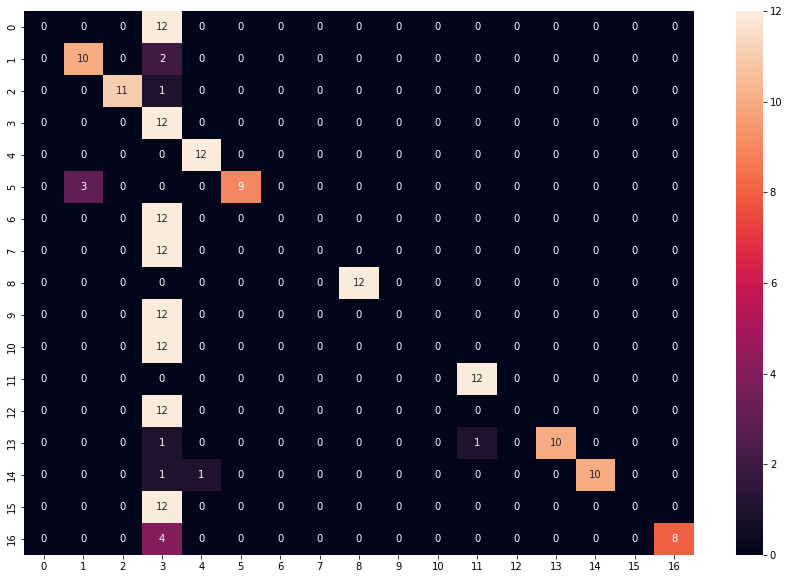

In [27]:
#visualization

plt.figure(figsize=(15,10))
sns.heatmap(cm, annot = True)
plt.show()

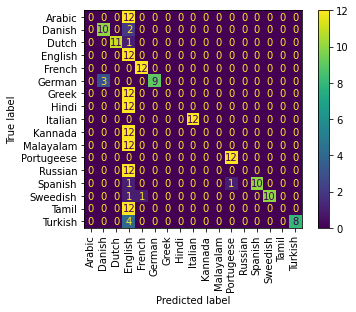

In [28]:
from sklearn.metrics import plot_confusion_matrix

graph = plot_confusion_matrix(model,data,new_test_y)
plt.xticks(rotation = 90)
plt.show()

In [29]:
#GUI

root = tk.Tk()

canvas = tk.Canvas(root, width = 700, height = 500)
canvas.pack()

Accuracy_result = ('Accuracy: ', accuracy)
label_Accuracy = tk.Label(root, text=Accuracy_result, justify = 'left')
canvas.create_window(260, 220, window=label_Accuracy)
label_Accuracy.config(font =("Times", 14))

label = tk.Label(root, text='Enter the text')
canvas.create_window(100, 100, window=label)
label.config(font=("Times", 14))

entry = tk.Entry (root)
canvas.create_window(270, 100, window=entry)
entry.config(font=("Times", 18))

def values():
    global text
    text = entry.get()
    x = cv.transform([text]).toarray()
    lang = model.predict(x)
    
    Prediction_result = ('Identify: ', lang)
    label_Prediction = tk.Label(root, text=Prediction_result, bg = 'red')
    canvas.create_window(260, 280, window=label_Prediction)
    
button = tk.Button (root, text= 'identify', command = values, bg = 'orange')
canvas.create_window(270, 150, window = button)
button.config(font = ("Times", 18))

lang = ["French","Greek","Dutch","Spanish","Japanese","Russian","Danish","Italian","Turkish","Swedish","Arabic","Malayalam","Hindi","Tamil","Telugu"]

var = tk.Variable(value = lang)
listbox = tk.Listbox(root, listvariable=var,height=4,selectmode=tk.EXTENDED)
listbox.pack(expand=True, fill=tk.BOTH)

root.mainloop()